## Import Libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load Data

In [2]:
df = pd.read_csv('Leads.csv')

## Understanding the Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


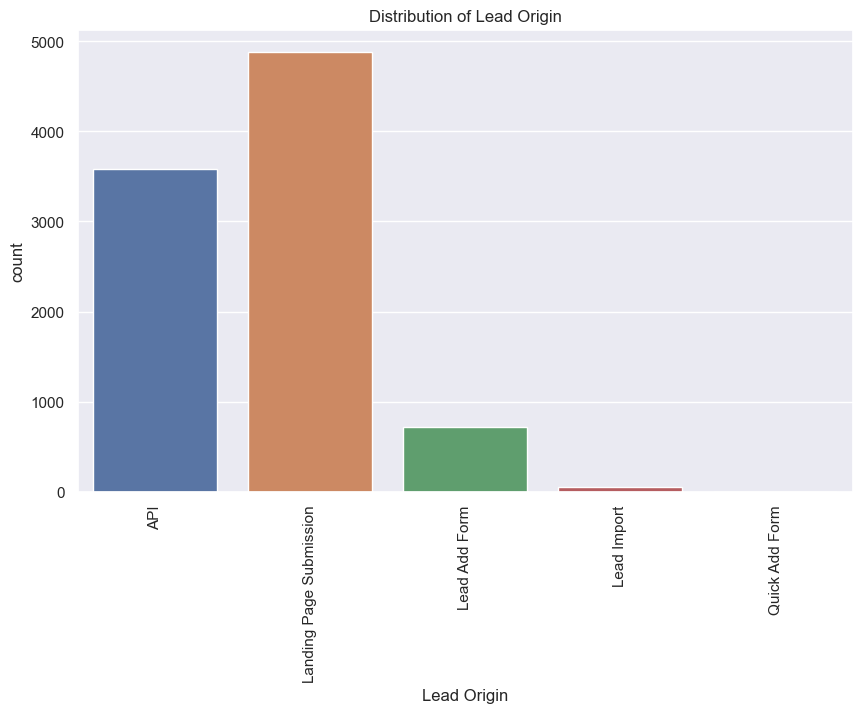

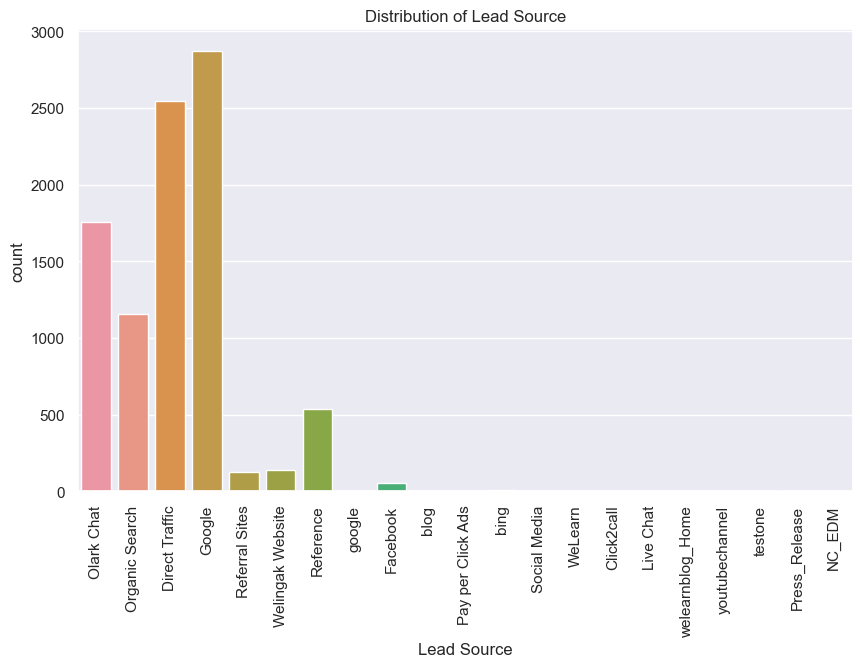

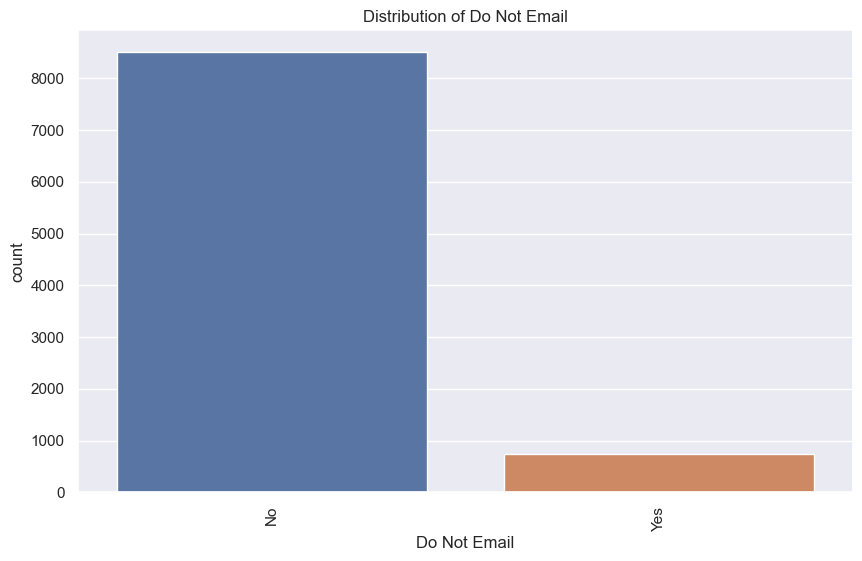

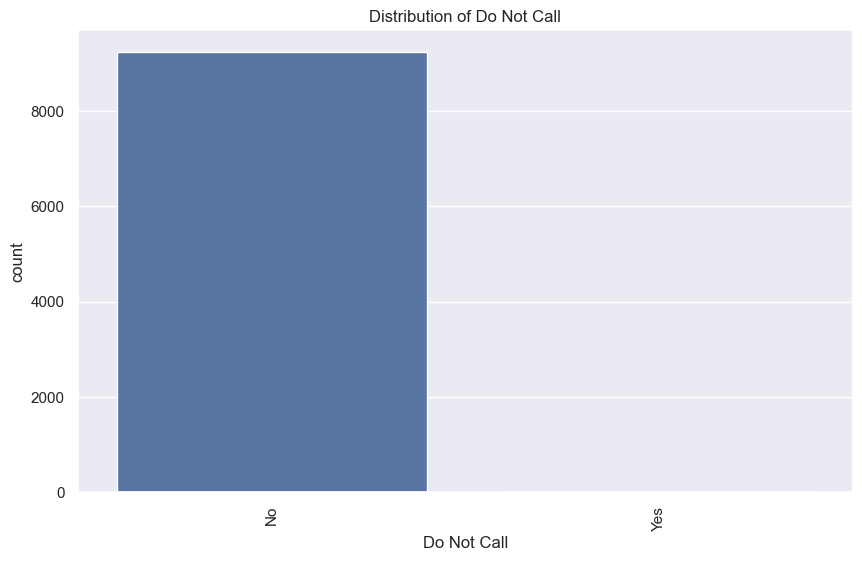

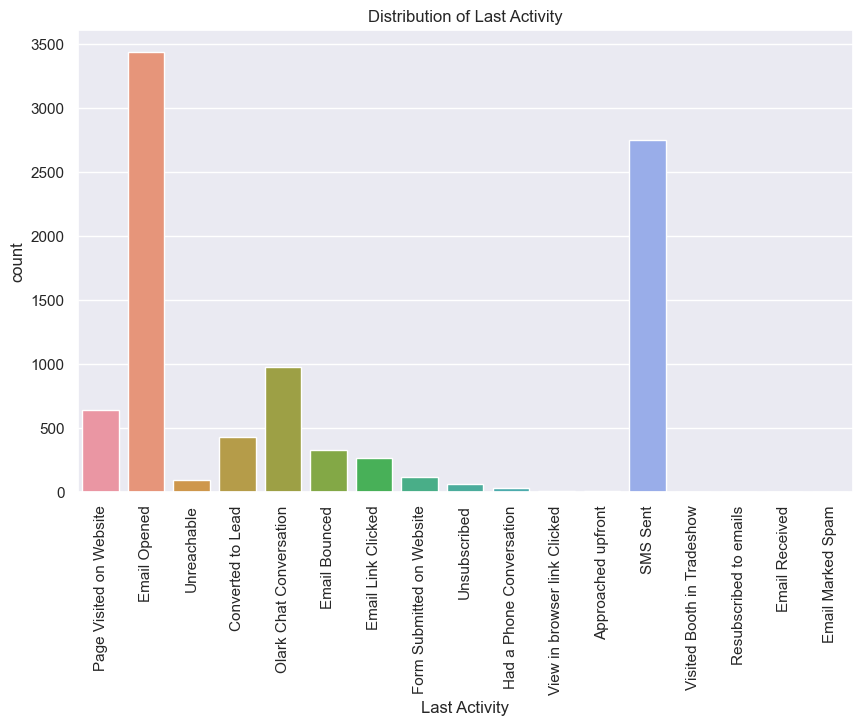

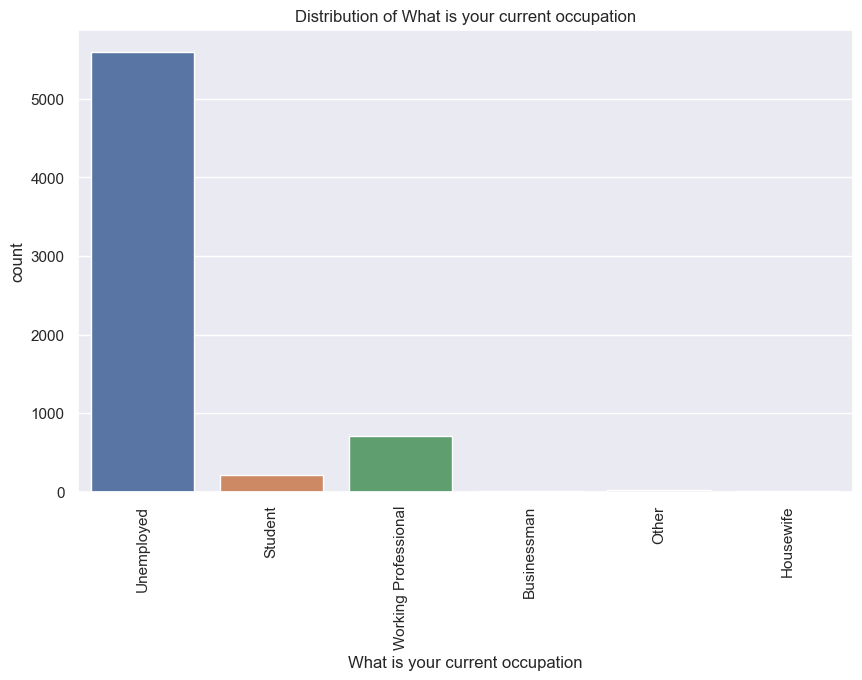

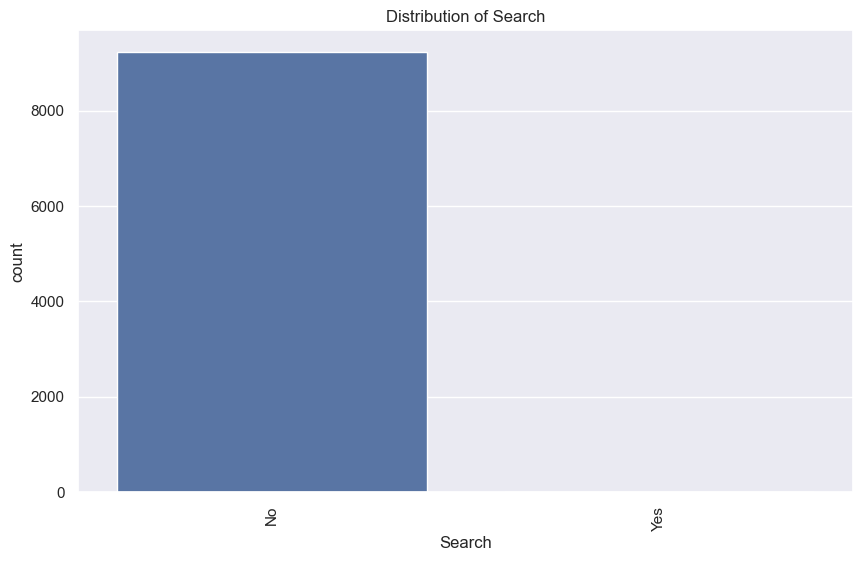

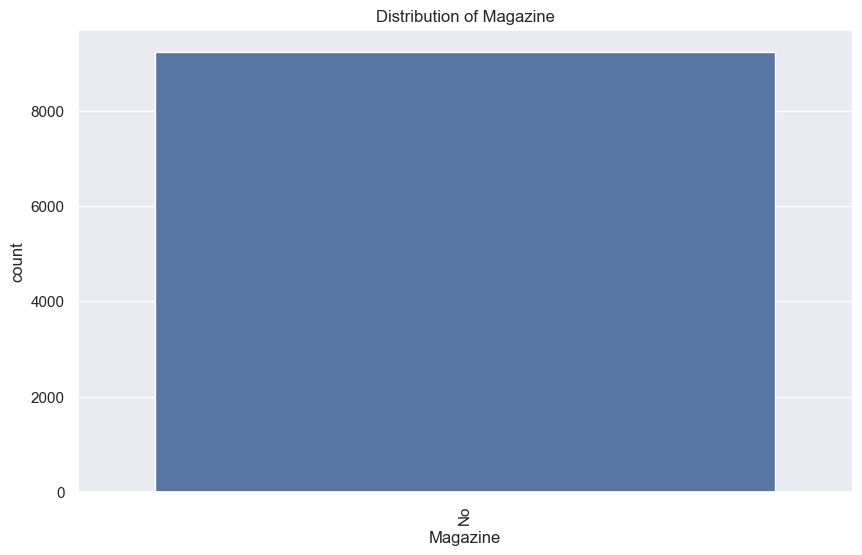

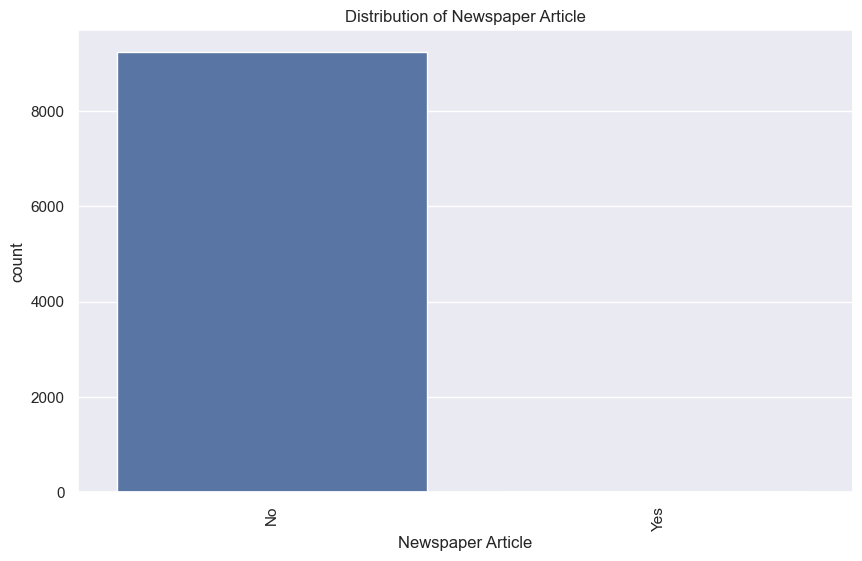

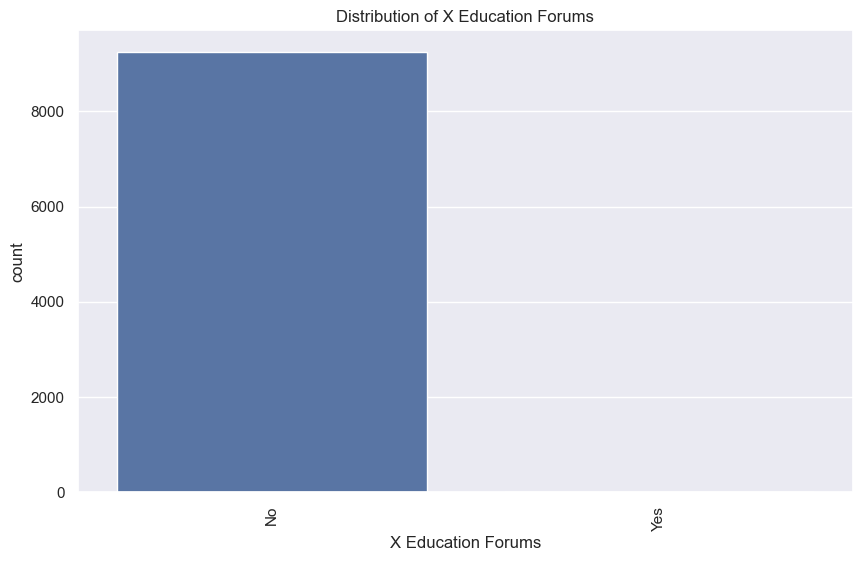

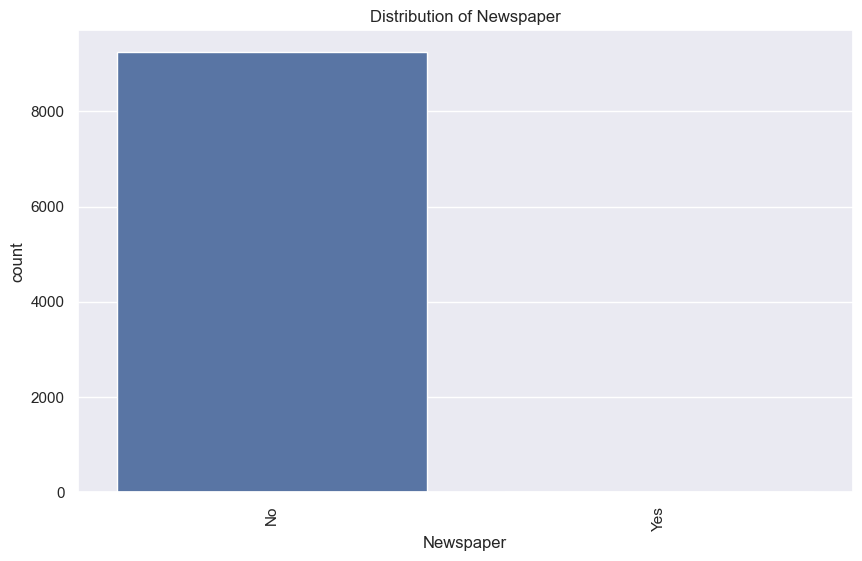

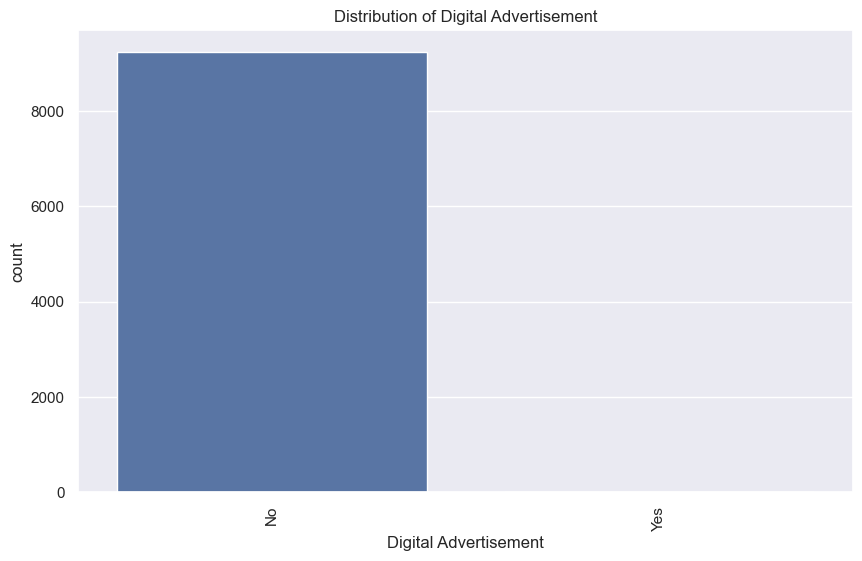

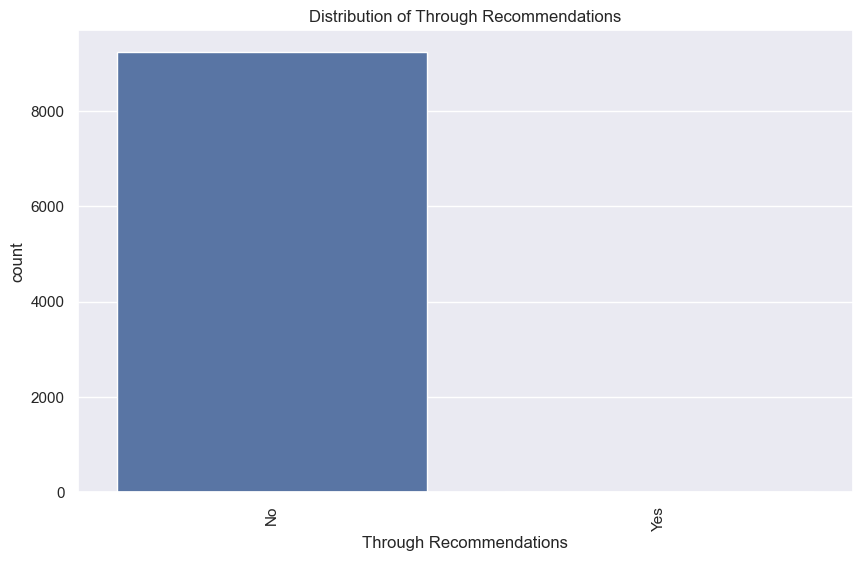

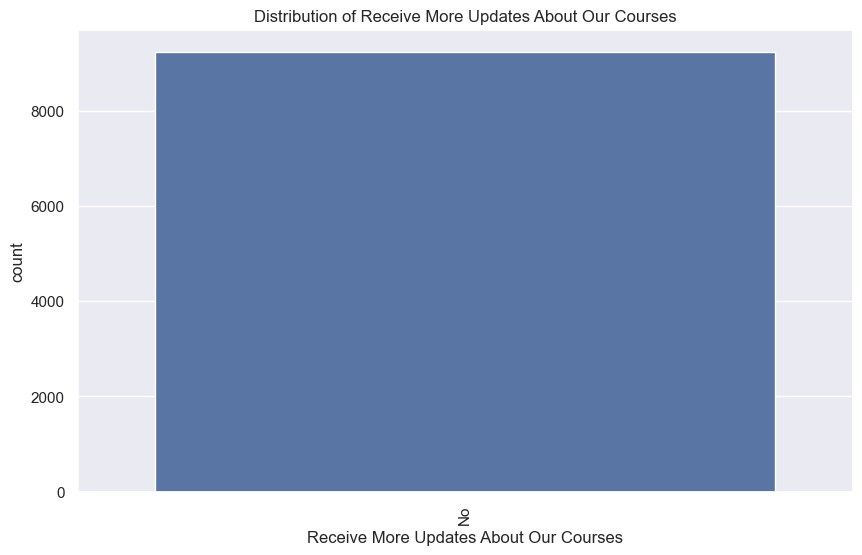

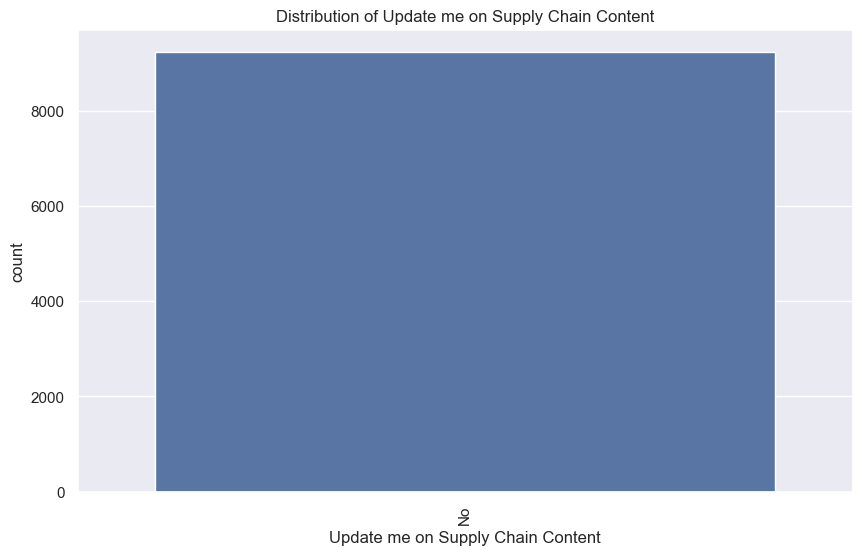

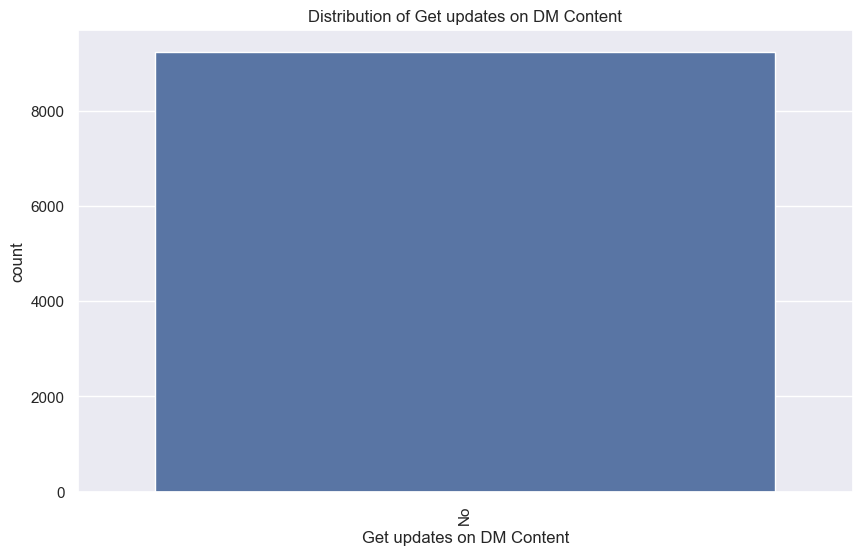

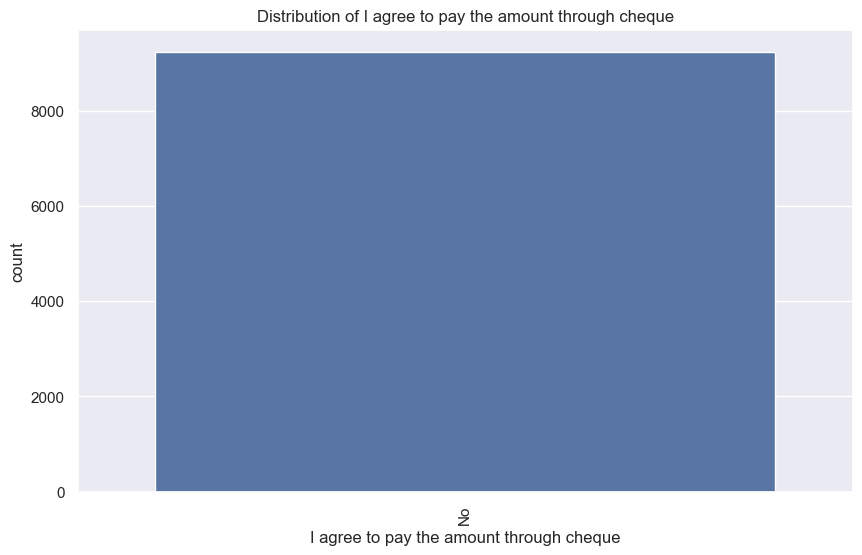

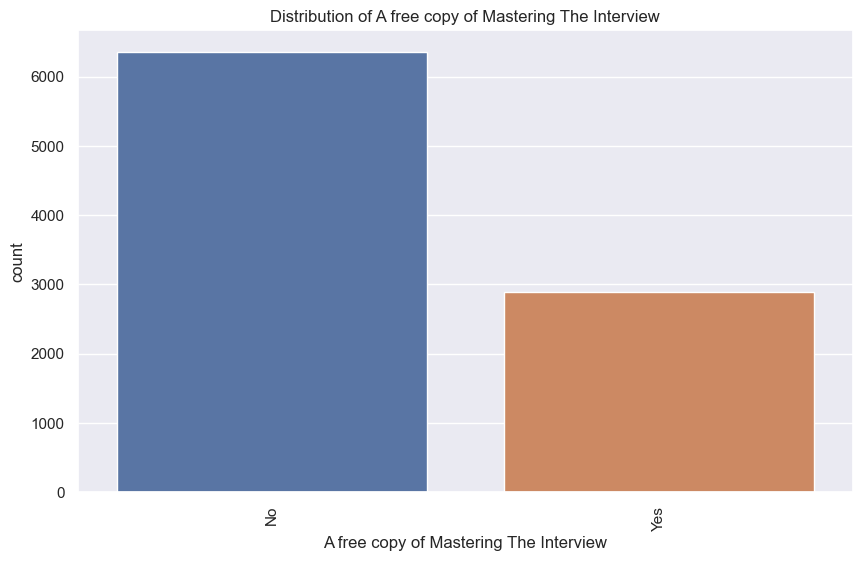

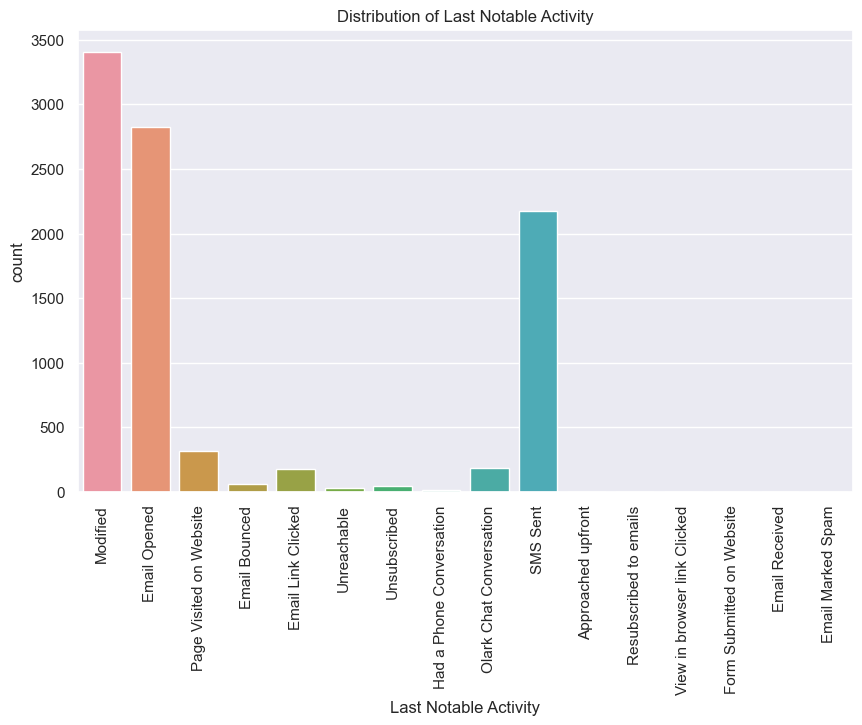

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical variables you want to analyze
categorical_variables = [
    'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity',
    'What is your current occupation', 
    'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
    'Digital Advertisement', 'Through Recommendations',
    'Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
    'Get updates on DM Content', 'I agree to pay the amount through cheque',
    'A free copy of Mastering The Interview', 'Last Notable Activity'
]

# Create a loop to display bar plots sequentially
for variable in categorical_variables:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=variable)
    plt.xticks(rotation=90)
    plt.title(f'Distribution of {variable}')
    plt.show()



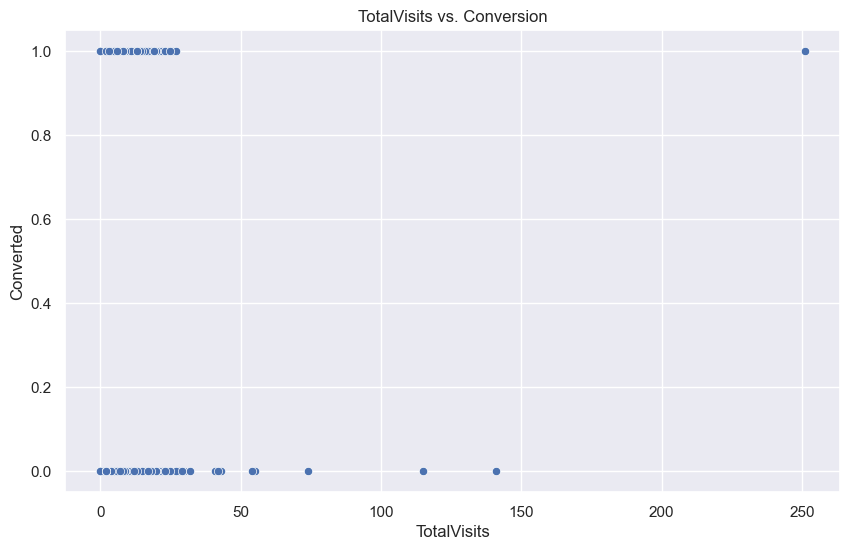

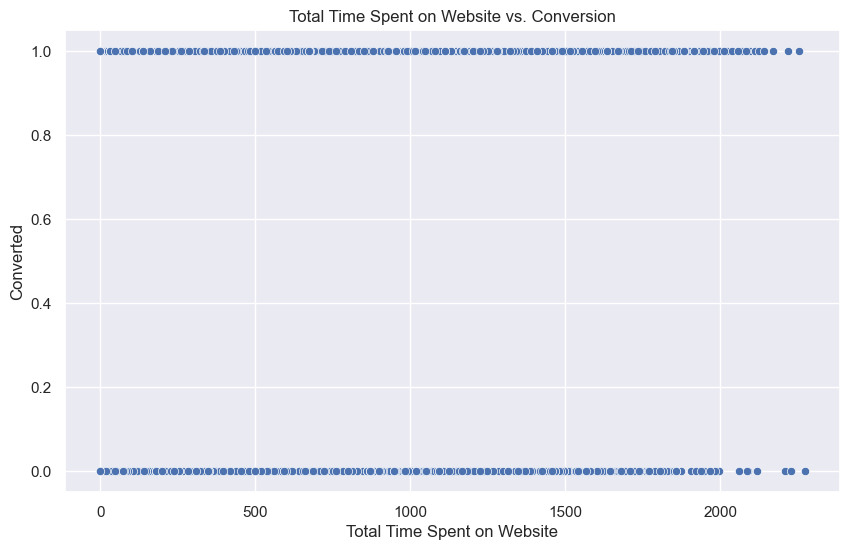

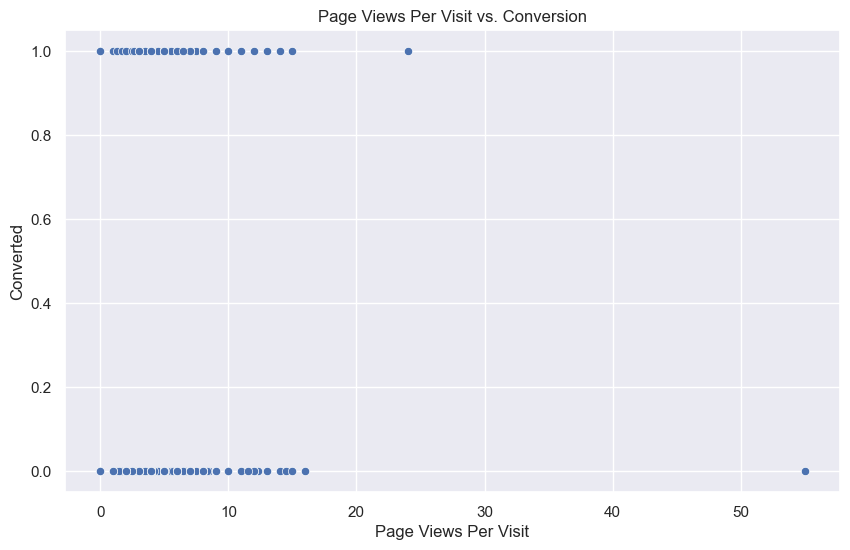

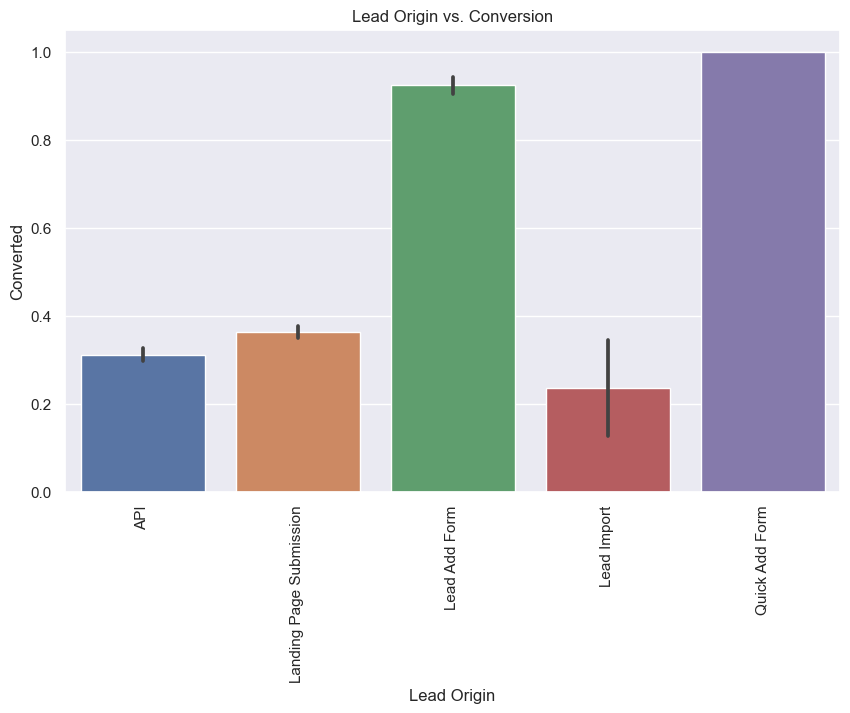

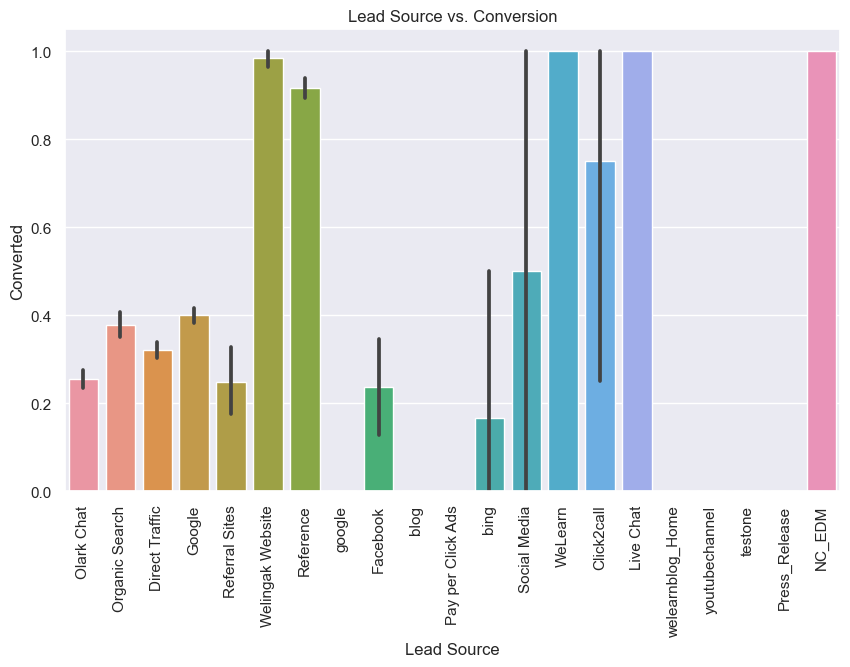

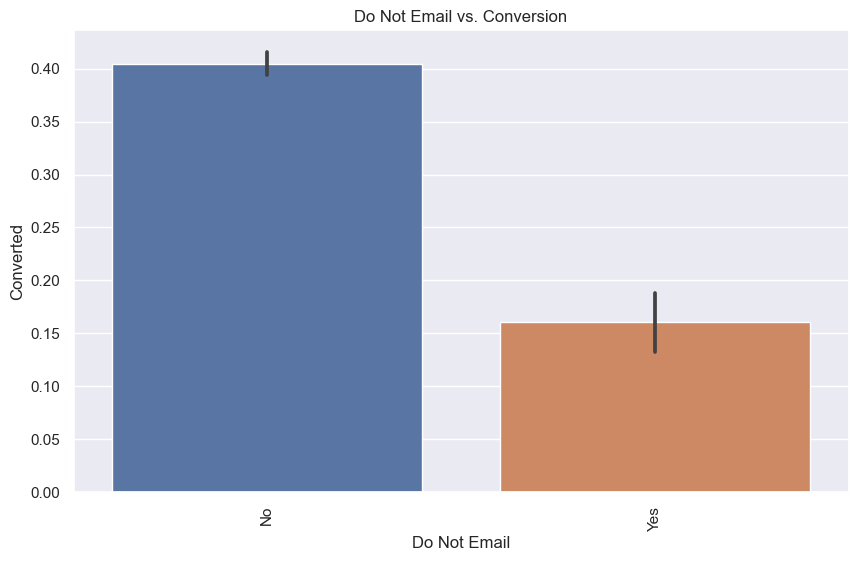

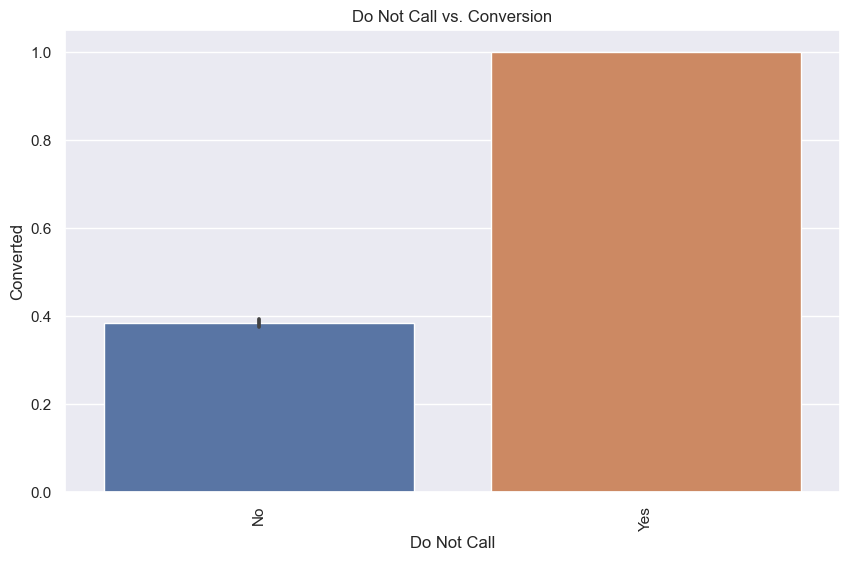

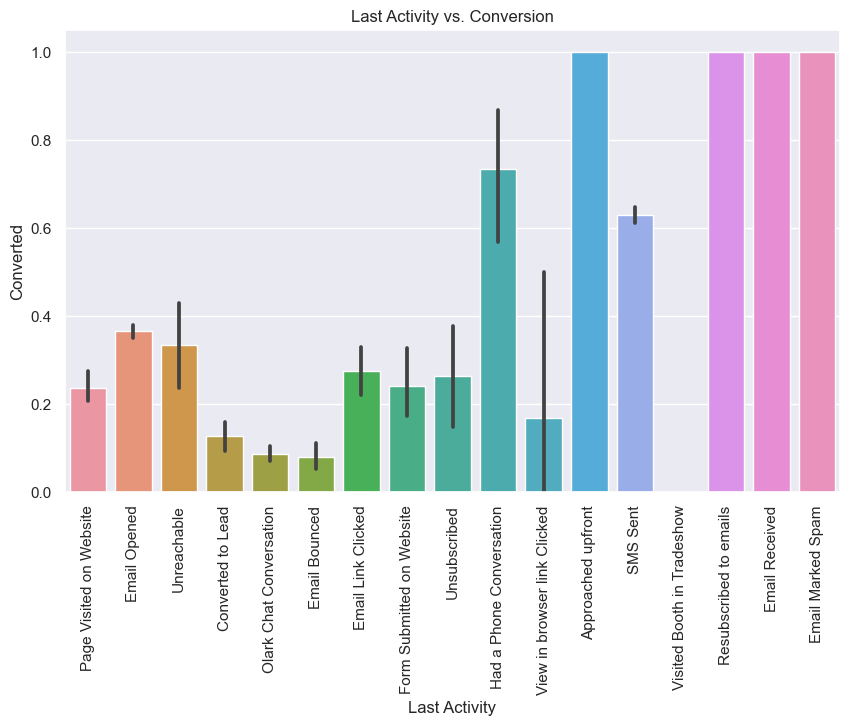

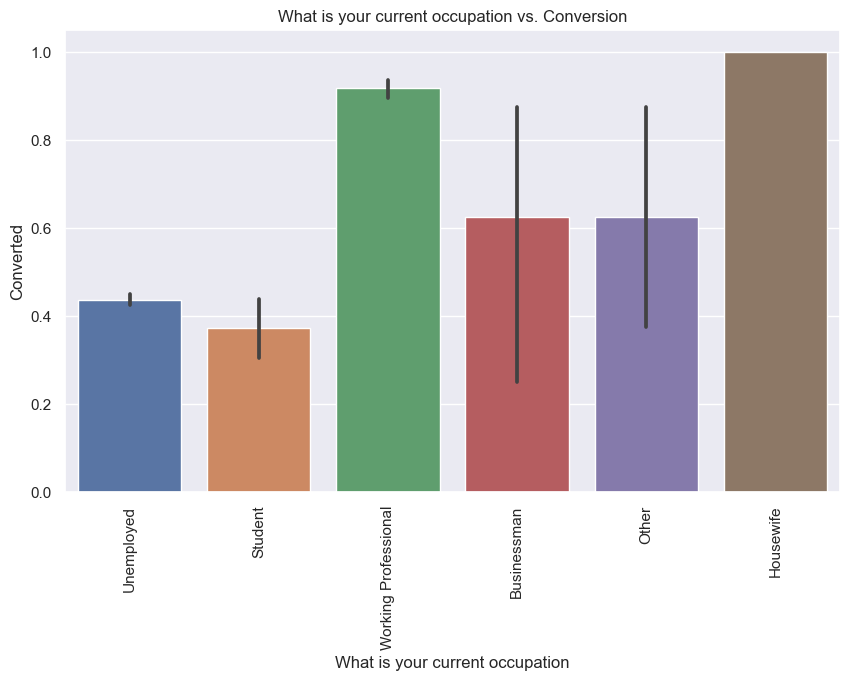

In [15]:


# Bivariate analysis for numeric variables
numeric_variables = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

for variable in numeric_variables:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=variable, y='Converted')
    plt.title(f'{variable} vs. Conversion')
    plt.show()

# Bivariate analysis for categorical variables
categorical_variables = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'What is your current occupation']

for variable in categorical_variables:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df, x=variable, y='Converted')
    plt.xticks(rotation=90)
    plt.title(f'{variable} vs. Conversion')
    plt.show()


## Handling Missing Values

In [19]:
# Remove rows with missing values
columns_to_drop = [
    'Tags',
    'Lead Quality',
    'Lead Profile',
    'City',
    'Asymmetrique Activity Index',
    'Asymmetrique Profile Index',
    'Asymmetrique Activity Score',
    'Asymmetrique Profile Score',
    'Country',
    'Specialization',
    'How did you hear about X Education',
    'Prospect ID',
    'Lead Number'
]

df.drop(columns=columns_to_drop, inplace=True)

# Fill missing values

df['Lead Source'].fillna(df['Lead Source'].mode()[0], inplace=True)
df['TotalVisits'].fillna(df['TotalVisits'].median(), inplace=True)
df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].median(), inplace=True)
df['Last Activity'].fillna(df['Last Activity'].mode()[0], inplace=True)
df['What is your current occupation'].fillna(df['What is your current occupation'].mode()[0], inplace=True)
df['What matters most to you in choosing a course'].fillna(df['What matters most to you in choosing a course'].mode()[0], inplace=True)

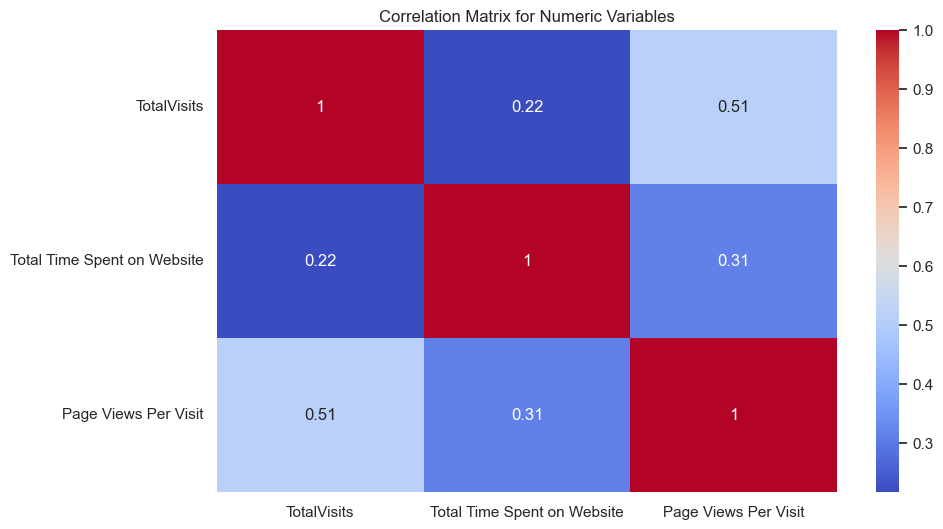

In [20]:
# Select the numeric variables for correlation analysis
numeric_variables = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

# Create a correlation matrix
correlation_matrix = df[numeric_variables].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Numeric Variables')
plt.show()


In [17]:
# Select the numeric variables for correlation analysis
numeric_variables = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

# Calculate the correlation matrix
correlation_matrix = df[numeric_variables].corr()

# Print the correlation matrix without the graph
print("Correlation Matrix for Numeric Variables:")
print(correlation_matrix)


Correlation Matrix for Numeric Variables:
                             TotalVisits  Total Time Spent on Website  \
TotalVisits                     1.000000                     0.221240   
Total Time Spent on Website     0.221240                     1.000000   
Page Views Per Visit            0.512125                     0.320361   

                             Page Views Per Visit  
TotalVisits                              0.512125  
Total Time Spent on Website              0.320361  
Page Views Per Visit                     1.000000  


/Users/santhoshsivansundaramoorthy/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


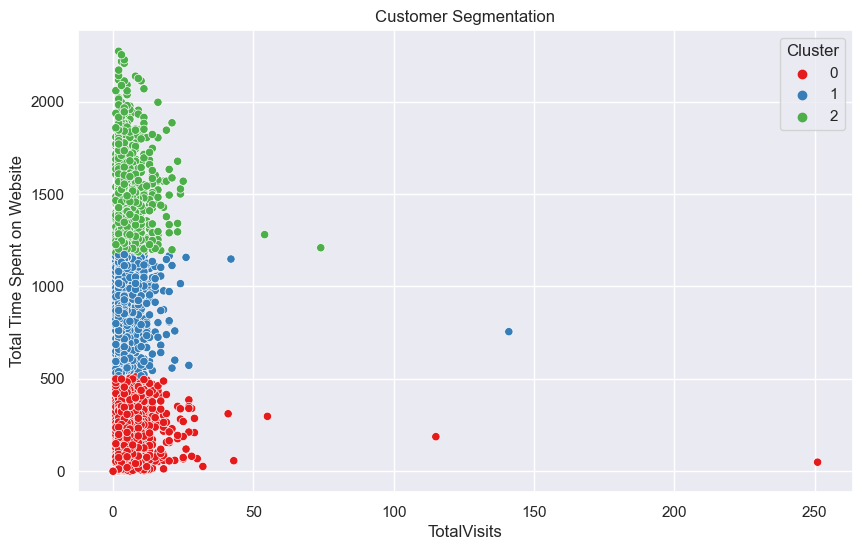

In [21]:
from sklearn.cluster import KMeans

# Select relevant features for clustering
numeric_features_for_clustering = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

# Choose the number of clusters (k) based on business objectives or methods like the elbow method
k = 3

# Create a new DataFrame with selected numeric features
features_for_clustering = df[numeric_features_for_clustering]

# Create a K-Means model and assign clusters to each data point
kmeans = KMeans(n_clusters=k, random_state=0)
df['Cluster'] = kmeans.fit_predict(features_for_clustering)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TotalVisits', y='Total Time Spent on Website', hue='Cluster', palette='Set1')
plt.title('Customer Segmentation')
plt.show()


## Dealing with Outliers

In [4]:
import pandas as pd

# Assuming df is your DataFrame with 78 columns
# Select the three columns of interest
columns_of_interest = df[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]

# Calculate quartiles and IQR for the selected columns
Q1 = columns_of_interest.quantile(0.25)
Q3 = columns_of_interest.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for potential outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find potential outliers for each column
potential_outliers = {
    'TotalVisits': columns_of_interest[(columns_of_interest['TotalVisits'] < lower_bound['TotalVisits']) | (columns_of_interest['TotalVisits'] > upper_bound['TotalVisits'])],
    'Total Time Spent on Website': columns_of_interest[(columns_of_interest['Total Time Spent on Website'] < lower_bound['Total Time Spent on Website']) | (columns_of_interest['Total Time Spent on Website'] > upper_bound['Total Time Spent on Website'])],
    'Page Views Per Visit': columns_of_interest[(columns_of_interest['Page Views Per Visit'] < lower_bound['Page Views Per Visit']) | (columns_of_interest['Page Views Per Visit'] > upper_bound['Page Views Per Visit'])]
}

# Print potential outliers
for column, outliers in potential_outliers.items():
    if not outliers.empty:
        print(f"Potential outliers in {column}:")
        print(outliers)


Potential outliers in TotalVisits:
      TotalVisits  Total Time Spent on Website  Page Views Per Visit
56           13.0                          436                 13.00
58           17.0                          409                  8.50
102          12.0                          809                  4.00
125          16.0                           53                 16.00
168          12.0                          493                 12.00
...           ...                          ...                   ...
9016         25.0                         1569                  2.08
9132         17.0                          119                  2.83
9138         14.0                          376                  2.80
9229         13.0                         1226                  6.50
9233         13.0                         1409                  2.60

[267 rows x 3 columns]
Potential outliers in Page Views Per Visit:
      TotalVisits  Total Time Spent on Website  Page Views Per Visit


In [5]:
import pandas as pd

# Assuming df is your DataFrame with the data
# Select the columns of interest
columns_to_winsorize = ['TotalVisits', 'Page Views Per Visit']

# Define the percentile for winsorization
percentile = 95

for column in columns_to_winsorize:
    q_lower = df[column].quantile((100 - percentile) / 2 / 100)
    q_upper = df[column].quantile(1 - (100 - percentile) / 2 / 100)
    
    # Apply winsorization
    df[column] = df[column].clip(lower=q_lower, upper=q_upper)


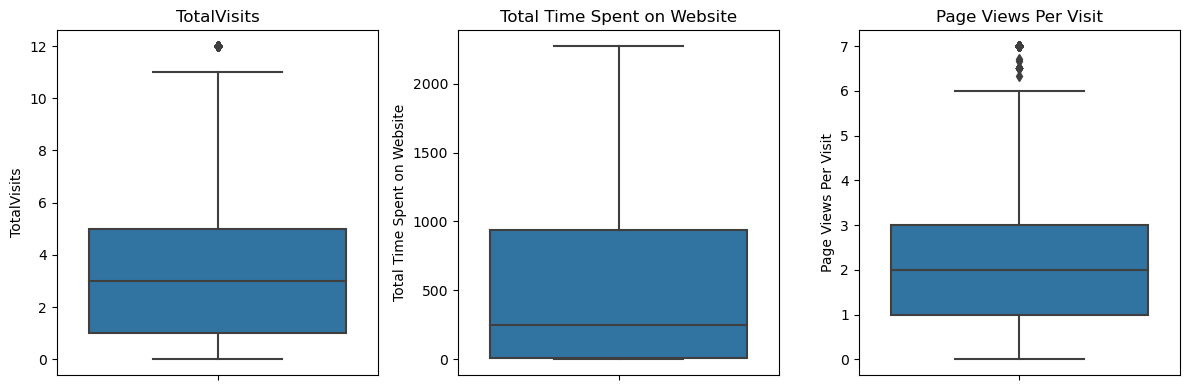

In [6]:


# Create a figure with subplots
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.boxplot(y=df['TotalVisits'])
plt.title('TotalVisits')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['Total Time Spent on Website'])
plt.title('Total Time Spent on Website')

plt.subplot(1, 3, 3)
sns.boxplot(y=df['Page Views Per Visit'])
plt.title('Page Views Per Visit')

# Display the box plots
plt.tight_layout()
plt.show()


In [7]:
df.to_csv('cleaned_data.csv', index=False)